In [213]:
import pandas as pd
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

from data import Dataloader
from models import RandomExampleModel
import metrics

In [214]:
# Loading the data
data_loader = Dataloader(r"C:\Users\louis\Documents\Cours\3A\SDP\cs-sdp-2023-24\data\dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()

In [215]:
# On modélise nos données par X-Y
X = pd.read_csv('../heuristic/data/X.csv')
Y = pd.read_csv('../heuristic/data/Y.csv')
Z = pd.read_csv('../heuristic/data/Z.csv')

#Créer un nouveau dataframe qui contient al différence de X et Y 
df_to_cluster = pd.DataFrame()
for i in range(len(Y.columns.tolist())):
    df_to_cluster['x_'+ str(i)+ '-y_'+ str(i)] = X.iloc[:,i] - Y.iloc[:,i]

df_to_cluster = df_to_cluster.drop(columns = df_to_cluster.columns[0])

In [216]:
df_to_cluster

,x_1-y_1,x_2-y_2,x_3-y_3,x_4-y_4,x_5-y_5,x_6-y_6,x_7-y_7,x_8-y_8,x_9-y_9,x_10-y_10
0,0.038135,0.019725,-0.125892,0.073635,0.353027,0.012785,-0.293403,-0.857827,0.210815,-0.595937
1,-0.667114,0.217595,-0.521156,-0.070553,-0.052733,0.229213,0.540640,-0.547254,0.869706,0.195672
2,-0.918778,-0.080685,0.021256,0.076361,-0.318341,0.463092,-0.952755,-0.084425,-0.882015,0.657680
3,-0.243255,0.910881,0.175194,0.565451,0.377506,-0.258493,-0.848966,0.395907,0.060109,0.278465
4,0.256666,0.210951,0.452093,-0.384230,-0.356686,0.129627,-0.161630,-0.601394,0.781211,0.084334
...,...,...,...,...,...,...,...,...,...,...
39997,0.639930,-0.194379,0.783711,-0.033865,-0.593419,0.218006,-0.779961,0.379849,0.015359,-0.707052
39998,0.235437,-0.095025,0.581017,0.018040,-0.224030,-0.024980,-0.092189,0.128870,-0.228516,0.289418
39999,0.392359,0.590513,0.024062,0.022426,-0.835639,-0.247433,0.051461,0.458857,-0.384010,-0.485622
40000,0.374404,0.362965,0.578017,-0.126381,0.062065,0.162652,-0.503885,0.079218,-0.472446,0.509851


# Exploration d'une approche avec réduction de dimension en utilisant PCA

In [217]:
# On implémente une PCA sur nos données puis  un algo de cluster EM 
# On fait une réduction de nos features vers 3 features principales

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df_to_cluster)

PCA(n_components=3)

In [218]:
# On rajoute nos colonnes corréspondant à nos composantes dans notre dataframe de base

pca_transform=pca.transform(df_to_cluster)
pca_df = pd.DataFrame(data=pca_transform, columns=['PCA_1', 'PCA_2', 'PCA_3'])
df_to_cluster[['PCA_1', 'PCA_2', 'PCA_3']] = pca_df[['PCA_1', 'PCA_2', 'PCA_3']]

In [219]:
df_to_cluster

,x_1-y_1,x_2-y_2,x_3-y_3,x_4-y_4,x_5-y_5,x_6-y_6,x_7-y_7,x_8-y_8,x_9-y_9,x_10-y_10,PCA_1,PCA_2,PCA_3
0,0.038135,0.019725,-0.125892,0.073635,0.353027,0.012785,-0.293403,-0.857827,0.210815,-0.595937,-0.220821,-0.421041,0.340020
1,-0.667114,0.217595,-0.521156,-0.070553,-0.052733,0.229213,0.540640,-0.547254,0.869706,0.195672,0.488527,-0.087385,1.247066
2,-0.918778,-0.080685,0.021256,0.076361,-0.318341,0.463092,-0.952755,-0.084425,-0.882015,0.657680,0.745796,0.566599,-0.558722
3,-0.243255,0.910881,0.175194,0.565451,0.377506,-0.258493,-0.848966,0.395907,0.060109,0.278465,-0.261328,0.441666,-0.025915
4,0.256666,0.210951,0.452093,-0.384230,-0.356686,0.129627,-0.161630,-0.601394,0.781211,0.084334,-0.000159,-0.498118,-0.057669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39997,0.639930,-0.194379,0.783711,-0.033865,-0.593419,0.218006,-0.779961,0.379849,0.015359,-0.707052,-0.044553,-0.451529,-1.247133
39998,0.235437,-0.095025,0.581017,0.018040,-0.224030,-0.024980,-0.092189,0.128870,-0.228516,0.289418,-0.081889,0.163172,-0.635162
39999,0.392359,0.590513,0.024062,0.022426,-0.835639,-0.247433,0.051461,0.458857,-0.384010,-0.485622,-0.527352,-0.525371,-0.351750
40000,0.374404,0.362965,0.578017,-0.126381,0.062065,0.162652,-0.503885,0.079218,-0.472446,0.509851,-0.112009,-0.044527,-0.815699


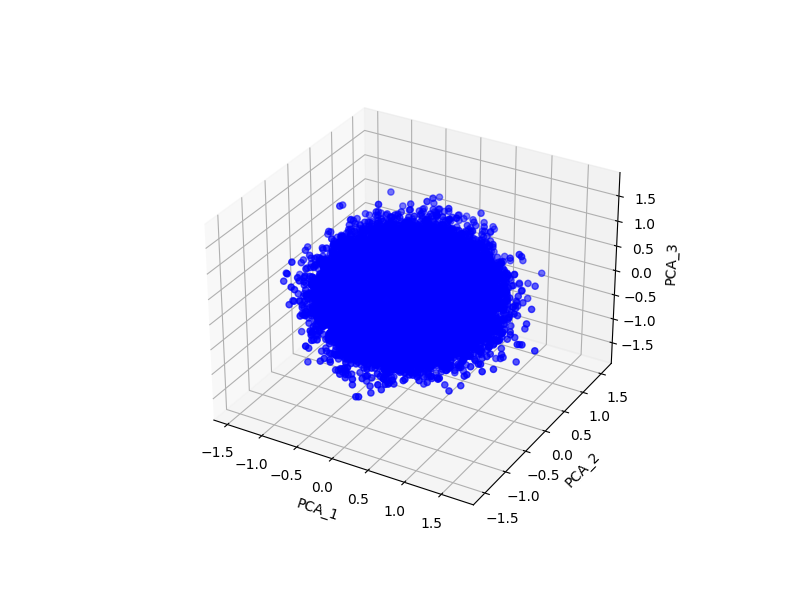

In [220]:
# pour pouvoir intéragir en 3D avec notre plot
#%matplotlib widget 

from mpl_toolkits.mplot3d import Axes3D

# Créez une figure 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot en 3D
ax.scatter(df_to_cluster['PCA_1'], df_to_cluster['PCA_2'], df_to_cluster['PCA_3'], c='blue', marker='o')

# Ajoutez des étiquettes aux axes
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')

# Affichez le graphique
plt.show()

C:\Users\louis\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


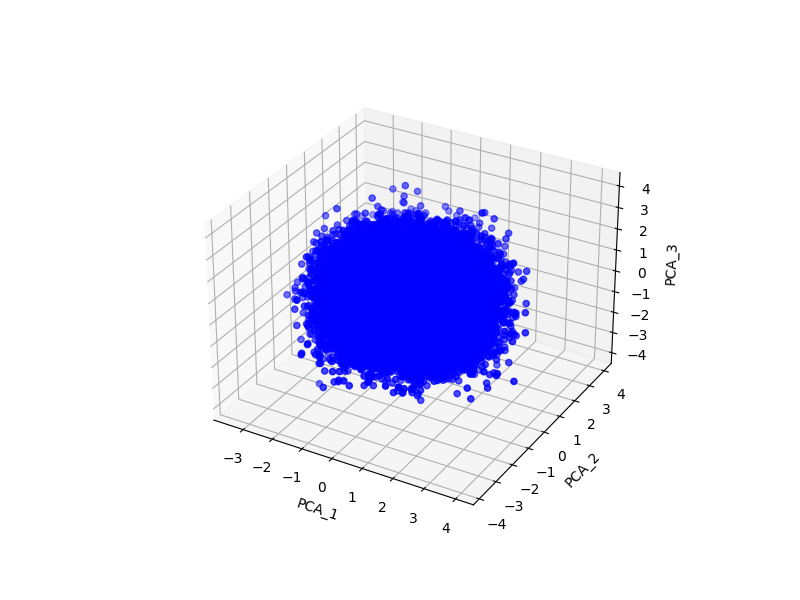

In [221]:
# On ne voit pas de séparation clair de nos données, on peut esssayer de normaliser nos données et/ou de faire une réduction à 2 dimensions:

df_to_cluster=df_to_cluster.iloc[:, :-3]

# Normalisation de nos données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_to_cluster)
df_to_cluster=pd.DataFrame(scaler.transform(df_to_cluster))


df_pca=pd.DataFrame(scaler.transform(df_to_cluster))
pca = PCA(n_components=3)
pca.fit(df_to_cluster)


pca_transform=pca.transform(df_to_cluster)
pca_df = pd.DataFrame(data=pca_transform, columns=['PCA_1', 'PCA_2', 'PCA_3'])
df_to_cluster[['PCA_1', 'PCA_2', 'PCA_3']] = pca_df[['PCA_1', 'PCA_2', 'PCA_3']]

%matplotlib widget 

# Créez une figure 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot en 3D
ax.scatter(df_to_cluster['PCA_1'], df_to_cluster['PCA_2'], df_to_cluster['PCA_3'], c='blue', marker='o')

# Ajoutez des étiquettes aux axes
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')

# Affichez le graphique
plt.show()

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

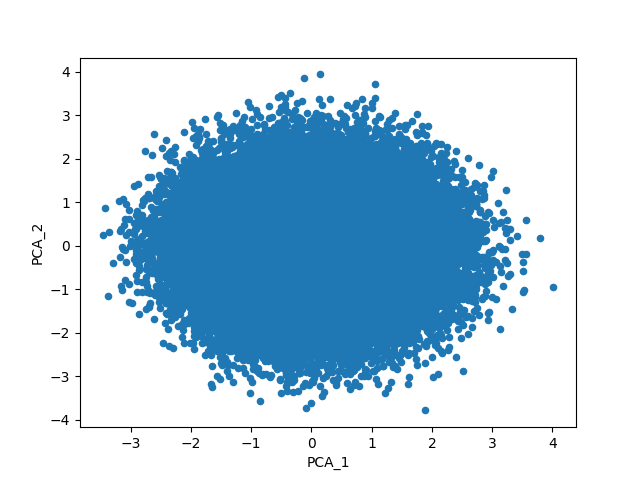

In [222]:
df_to_cluster=df_to_cluster.iloc[:, :-3]


scaler = StandardScaler()
scaler.fit(df_to_cluster)
df_to_cluster=pd.DataFrame(scaler.transform(df_to_cluster))


df_pca=pd.DataFrame(scaler.transform(df_to_cluster))
pca = PCA(n_components=2)
pca.fit(df_to_cluster)


pca_transform=pca.transform(df_to_cluster)
pca_df = pd.DataFrame(data=pca_transform, columns=['PCA_1', 'PCA_2'])
df_to_cluster[['PCA_1', 'PCA_2']] = pca_df[['PCA_1', 'PCA_2']]

df_to_cluster[['PCA_1','PCA_2']].plot.scatter(x='PCA_1',y='PCA_2')

In [224]:
# Pas de séparation clair de nos données grace à une PCA

# Clustering en utilisant EM 

In [225]:
from sklearn.mixture import GaussianMixture

In [226]:
gm = GaussianMixture(n_components=3).fit(df_to_cluster[['PCA_1', 'PCA_2']])
gm.get_params() 

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 3,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [227]:
centers = gm.means_
print(centers)

[[ 0.97200894  0.29635895]
 [-0.6883613   0.57028058]
 [-0.19728139 -0.89516423]]


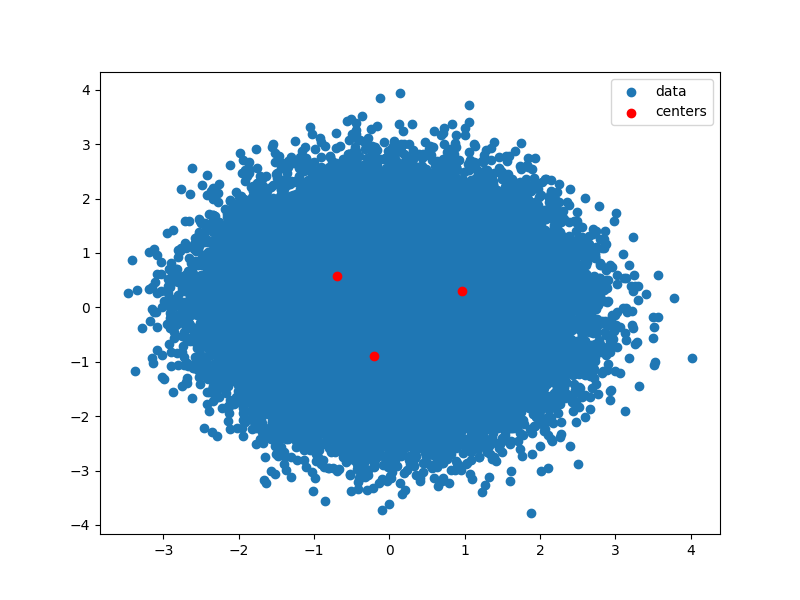

In [228]:

plt.figure(figsize=(8, 6))
plt.scatter(df_to_cluster.PCA_1, df_to_cluster.PCA_2, label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

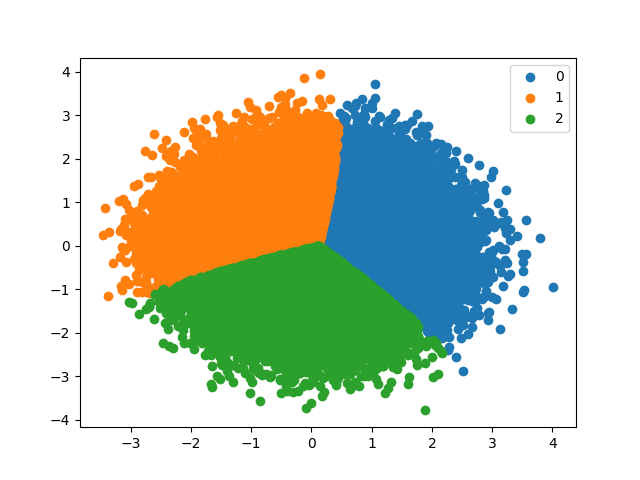

In [231]:
pred = gm.predict(df_to_cluster[['PCA_1', 'PCA_2']])

df = pd.DataFrame({'PCA_1':df_to_cluster.PCA_1, 'PCA_2':df_to_cluster.PCA_2, 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.PCA_1, group.PCA_2, label=name)

ax.legend()
plt.show() 